<a href="https://colab.research.google.com/github/Nadalaou/AI/blob/main/Essai11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wget
!pip install open3d
!pip install opencv-python-headless
!pip install pypotree

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=1e9cdcf1a47e8fb614c97db26333d7ae4ddd37eb8e2fa876e7e4b6bec2b193fd
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.7 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempt

In [ ]:
# mounter google drive
import os
import wget
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/

Mounted at /content/drive
/content/drive/My Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
download_path = "LidarCameraFusion"
if not os.path.exists(download_path):
    os.makedirs(download_path)
    print(download_path, "- Created Successfully!")
else:
    print("Folder already exists!")

Folder already exists!


In [ ]:
# télécharger la base de données
dataset_url = "https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_drive_0009/2011_09_26_drive_0009_sync.zip"
calib_url1 = "https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_calib.zip"

In [ ]:
# Extraire la base de données
# Download dataset zip file
print('Downloading dataset zip file...')
wget.download(dataset_url, out=download_path)

# Download first calibration zip file
print('Downloading first calibration zip file...')
wget.download(calib_url1, out=download_path)


'LidarCameraFusion/2011_09_26_calib (1).zip'

In [ ]:
# Change directory to download path
%cd LidarCameraFusion

# Unzip all downloaded files
!unzip 2011_09_26_drive_0009_sync.zip -d . &> /dev/null
!unzip 2011_09_26_calib.zip -d . &> /dev/null

/content/drive/MyDrive/LidarCameraFusion


In [ ]:
%cd /content/drive/MyDrive/LidarCameraFusion/2011_09_26/2011_09_26_drive_0009_sync

/content/drive/MyDrive/LidarCameraFusion/2011_09_26/2011_09_26_drive_0009_sync


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt #pour créer des graphiques
import matplotlib.image as mpimg #pour lire et afficher des images
from IPython.display import Image
import glob #lire tous les fichiers LiDAR
import numpy as np
import struct #pour lire les données binaires LIDAR
import open3d as o3d

In [ ]:
# fonction bintopcd
def BinToPcd(point_file):
  size_float = 4
  list_pcd = []
  file_to_open = point_file
  file_to_save = str(point_file)[:-3]+"pcd"
  with open (file_to_open, "rb") as f:
      byte = f.read(size_float*4)
      while byte:
          x,y,z,intensity = struct.unpack("ffff", byte)
          list_pcd.append([x, y, z])
          byte = f.read(size_float*4)
  np_pcd = np.asarray(list_pcd)
  pcd = o3d.geometry.PointCloud()
  v3d = o3d.utility.Vector3dVector
  pcd.points = v3d(np_pcd)
  o3d.io.write_point_cloud(file_to_save, pcd)

# lire les fichiers bin
point_files = sorted(glob.glob("velodyne_points/data/*.bin"))
# Convertir bin to PCD
for binFile in point_files:
  BinToPcd(binFile)

In [ ]:
image_files = sorted(glob.glob("image_00/data/*.png"))
point_files = sorted(glob.glob("velodyne_points/data/*.pcd"))
index = 1
pcd_file = point_files[index]
image = cv2.cvtColor(cv2.imread(image_files[index]), cv2.COLOR_BGR2RGB)
cloud = o3d.io.read_point_cloud(pcd_file)
points= np.asarray(cloud.points) #convertir les coordonnés des pt de nuages de pts en tableau

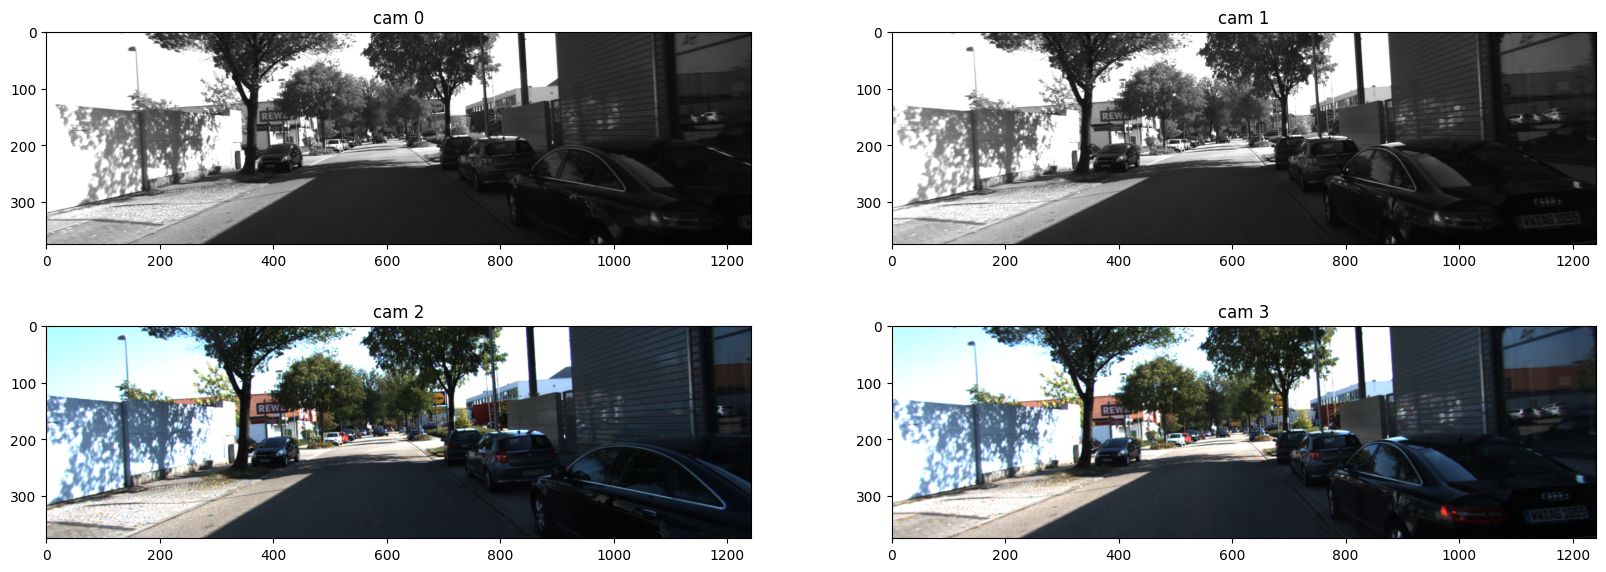

In [ ]:
# lire les données des caméras
camera0_images = sorted(glob.glob("image_00/data/*.png"))
camera1_images = sorted(glob.glob("image_01/data/*.png"))
camera2_images = sorted(glob.glob("image_02/data/*.png"))
camera3_images = sorted(glob.glob("image_03/data/*.png"))

# Créer 4 images pour 4 cameras
img_cam0 = cv2.cvtColor(cv2.imread(camera0_images[index]), cv2.COLOR_BGR2RGB)
img_cam1 = cv2.cvtColor(cv2.imread(camera1_images[index]), cv2.COLOR_BGR2RGB)
img_cam2 = cv2.cvtColor(cv2.imread(camera2_images[index]), cv2.COLOR_BGR2RGB)
img_cam3 = cv2.cvtColor(cv2.imread(camera3_images[index]), cv2.COLOR_BGR2RGB)

# Créer  2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 7))

# Set the first subplot to display the first image
axs[0, 0].imshow(img_cam0)
axs[0, 0].set_title('cam 0')

# Set the second subplot to display the second image
axs[0, 1].imshow(img_cam1)
axs[0, 1].set_title('cam 1')

# Set the third subplot to display the third image
axs[1, 0].imshow(img_cam2)
axs[1, 0].set_title('cam 2')

# Set the fourth subplot to display the fourth image
axs[1, 1].imshow(img_cam3)
axs[1, 1].set_title('cam 3')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Image')

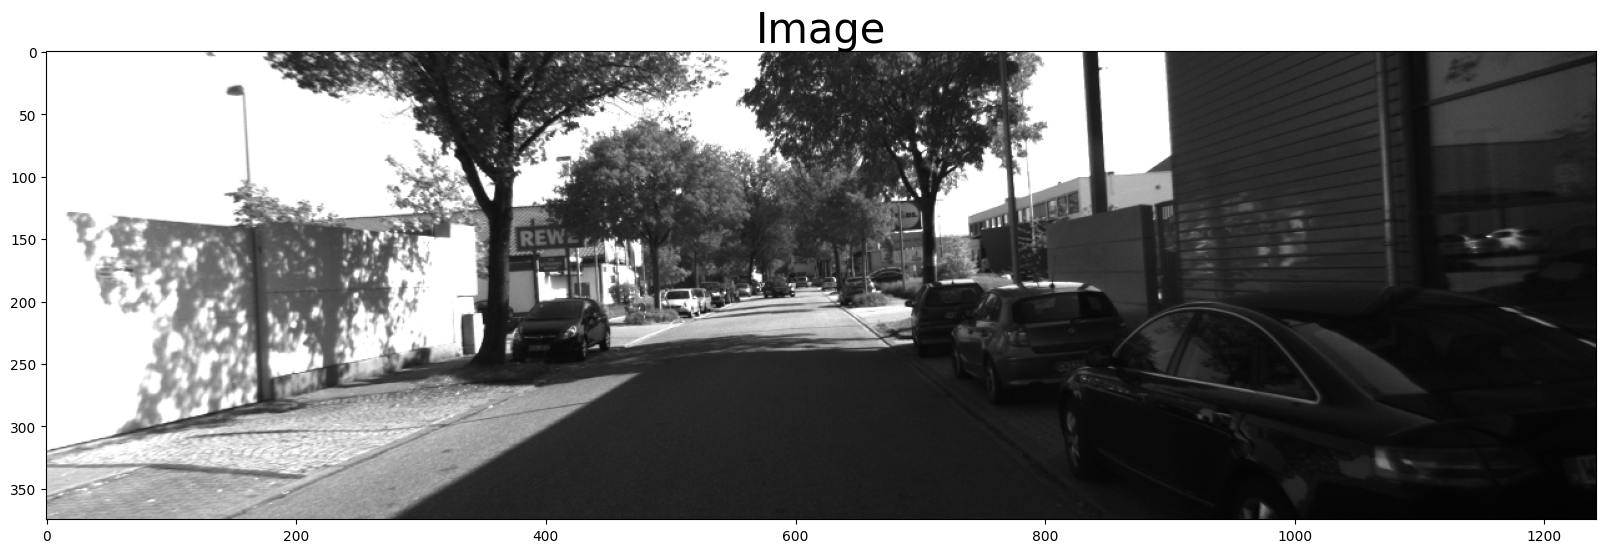

In [ ]:
f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Image', fontsize=30)

In [ ]:
import pypotree
cloudpath = pypotree.generate_cloud_for_display(points)
pypotree.display_cloud_colab(cloudpath)

/usr/local/lib/python3.10/dist-packages/bin/PotreeConverter .tmp.txt -f xyz -o point_clouds -p 0f93b6 --material ELEVATION --edl-enabled --overwrite
server on port 42527: thread <Thread(Thread-12 (server_entry), started 136637975623232)> 
https://localhost:42527/point_clouds/pointclouds/0f93b6


In [ ]:
import os
import wget

# Créez le répertoire de téléchargement si nécessaire
calib_path = "calibration_files"
if not os.path.exists(calib_path):
    os.makedirs(calib_path)

# URL du fichier de calibration
calib_url = "https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_calib.zip"

# Téléchargez le fichier de calibration
print(f'Téléchargement de {calib_url} ...')
wget.download(calib_url, out=calib_path)

# Décompressez le fichier de calibration
import zipfile

with zipfile.ZipFile(os.path.join(calib_path, "2011_09_26_calib.zip"), 'r') as zip_ref:
    zip_ref.extractall(calib_path)

print("Téléchargement et extraction des fichiers de calibration terminés.")

Téléchargement de https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_calib.zip ...
Téléchargement et extraction des fichiers de calibration terminés.


In [ ]:
%cd /content/drive/MyDrive/LidarCameraFusion/2011_09_26/2011_09_26_drive_0009_sync/calibration_files/2011_09_26

/content/drive/MyDrive/LidarCameraFusion/2011_09_26/2011_09_26_drive_0009_sync/calibration_files/2011_09_26


In [ ]:
def read_calib_file(filepath):
    calib = {}
    with open(filepath, 'r') as f:
        for line in f:
            key, value = line.split(':', 1)   #lit un fichier de calibration, extrait les données et les stocke dans un dictionnaire
            try:
                calib[key] = np.array([float(x) for x in value.split()])
            except ValueError:
                continue  # Ignore lines that do not contain numeric values
    return calib

In [ ]:
# Chemin des fichiers de calibration
calib_cam_to_cam_path = "calib_cam_to_cam.txt"
calib_velo_to_cam_path = "calib_velo_to_cam.txt"

# Lire les fichiers de calibration
calib_cam_to_cam = read_calib_file(calib_cam_to_cam_path)
calib_velo_to_cam = read_calib_file(calib_velo_to_cam_path)

In [ ]:
%cd /content/drive/MyDrive/LidarCameraFusion/2011_09_26/2011_09_26_drive_0009_sync

/content/drive/MyDrive/LidarCameraFusion/2011_09_26/2011_09_26_drive_0009_sync


Clés dans calib_cam_to_cam: dict_keys(['corner_dist', 'S_00', 'K_00', 'D_00', 'R_00', 'T_00', 'S_rect_00', 'R_rect_00', 'P_rect_00', 'S_01', 'K_01', 'D_01', 'R_01', 'T_01', 'S_rect_01', 'R_rect_01', 'P_rect_01', 'S_02', 'K_02', 'D_02', 'R_02', 'T_02', 'S_rect_02', 'R_rect_02', 'P_rect_02', 'S_03', 'K_03', 'D_03', 'R_03', 'T_03', 'S_rect_03', 'R_rect_03', 'P_rect_03'])
Clés dans calib_velo_to_cam: dict_keys(['R', 'T', 'delta_f', 'delta_c'])
Nombre de fichiers .bin trouvés: 172
Nombre d'images trouvées: 447
velodyne_points/data/0000000002.bin
velodyne_points/data/0000000003.bin
velodyne_points/data/0000000004.bin
velodyne_points/data/0000000007.bin
velodyne_points/data/0000000011.bin
velodyne_points/data/0000000013.bin
velodyne_points/data/0000000014.bin
velodyne_points/data/0000000018.bin
velodyne_points/data/0000000022.bin
velodyne_points/data/0000000025.bin
velodyne_points/data/0000000026.bin
velodyne_points/data/0000000027.bin
velodyne_points/data/0000000028.bin
velodyne_points/data/

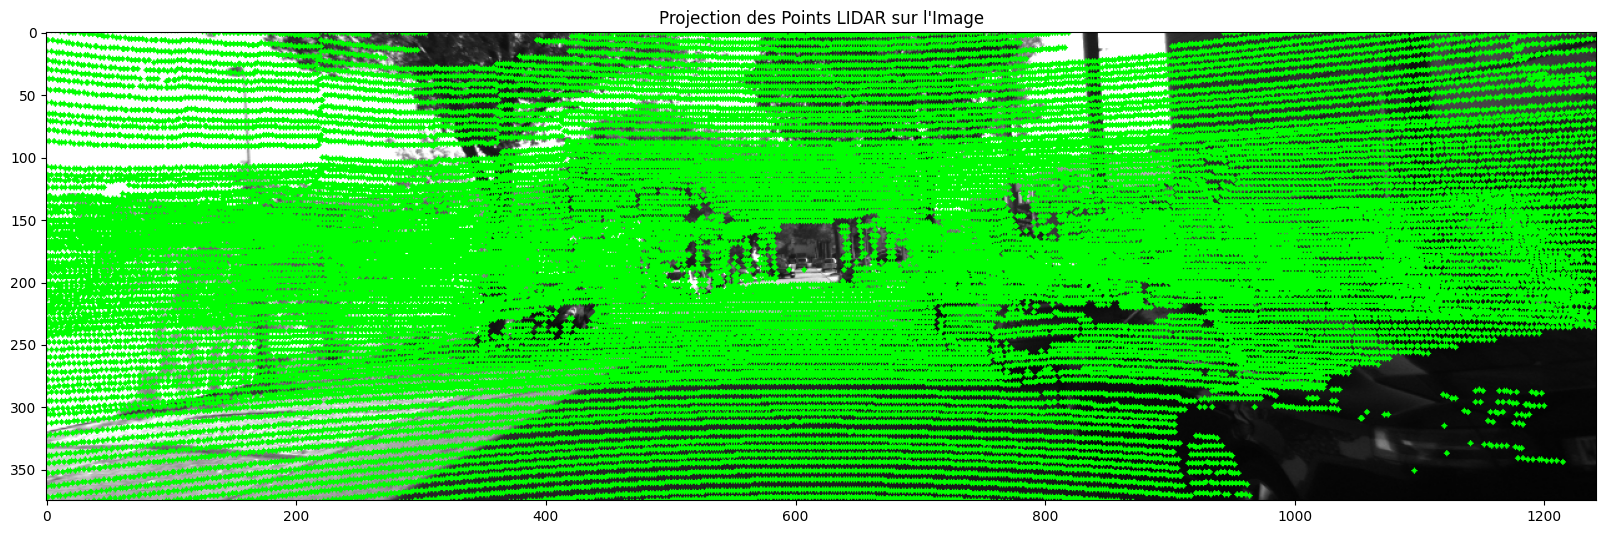

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import open3d as o3d
import glob

# Afficher les clés disponibles
print("Clés dans calib_cam_to_cam:", calib_cam_to_cam.keys())
print("Clés dans calib_velo_to_cam:", calib_velo_to_cam.keys())

# Extraire les matrices de calibration nécessaires
P_rect_02 = calib_cam_to_cam['P_rect_02'].reshape(3, 4)
R_rect_00 = calib_cam_to_cam['R_rect_00'].reshape(3, 3)
R_velo_to_cam = calib_velo_to_cam['R'].reshape(3, 3)
T_velo_to_cam = calib_velo_to_cam['T'].reshape(3, 1)

# Ajouter une ligne [0, 0, 0, 1] pour transformer en matrice 4x4
Tr_velo_to_cam = np.hstack((R_velo_to_cam, T_velo_to_cam))
Tr_velo_to_cam = np.vstack((Tr_velo_to_cam, [0, 0, 0, 1]))

# Lire les fichiers bin (points LIDAR)
point_files = sorted(glob.glob("velodyne_points/data/*.bin"))
image_files = sorted(glob.glob("image_00/data/*.png"))

# Vérifier le nombre de fichiers trouvés
print("Nombre de fichiers .bin trouvés:", len(point_files))
print("Nombre d'images trouvées:", len(image_files))

# Vérifier les chemins des fichiers bin
for file in point_files:
    print(file)

# Définir une fonction pour projeter les points LIDAR sur l'image
def project_lidar_to_image(lidar_points, P, R, Tr):
    # Ajouter une colonne de 1 pour les coordonnées homogènes
    lidar_points_homogeneous = np.hstack((lidar_points, np.ones((lidar_points.shape[0], 1), dtype=np.float32)))

    # Transformer les points LIDAR dans le repère de la caméra
    lidar_points_cam = (Tr @ lidar_points_homogeneous.T).T

    # Projeter les points dans le plan de l'image
    image_points_homogeneous = P @ lidar_points_cam.T
    image_points = image_points_homogeneous[:2, :] / image_points_homogeneous[2, :]

    return image_points.T

# Choisir un index de fichier
index = 1

# Charger les points LIDAR et l'image correspondante
if index < len(point_files):
    lidar_points = np.fromfile(point_files[index], dtype=np.float32).reshape(-1, 4)[:, :3]
    image = cv2.cvtColor(cv2.imread(image_files[index]), cv2.COLOR_BGR2RGB)
    projected_points = project_lidar_to_image(lidar_points, P_rect_02, R_rect_00, Tr_velo_to_cam)

    # Dessiner les points projetés sur l'image
    for point in projected_points:
        cv2.circle(image, (int(point[0]), int(point[1])), 2, (0, 255, 0), -1)

    # Afficher l'image avec les points projetés
    plt.figure(figsize=(20, 10))
    plt.imshow(image)
    plt.title('Projection des Points LIDAR sur l\'Image')
    plt.show()
else:
    print("Index hors de portée. Vérifiez le nombre de fichiers trouvés et l'index choisi.")

In [ ]:
# Fonction pour charger les données LIDAR
def load_lidar_data(file_path):
    return np.fromfile(file_path, dtype=np.float32).reshape(-1, 4)[:, :3]

# Fonction pour charger les images de caméra
def load_image(file_path):
    return cv2.cvtColor(cv2.imread(file_path), cv2.COLOR_BGR2RGB)

# Chargement des données LIDAR et images synchronisées
lidar_data = [load_lidar_data(file) for file in point_files]
image_data = [load_image(file) for file in image_files]

In [ ]:
# Fonction pour normaliser les données LIDAR
def normalize_data(data):
    normalized_data = (data - np.mean(data)) / np.std(data)
    return normalized_data

# Normalisation des données LIDAR
lidar_data_normalized = [normalize_data(data) for data in lidar_data]

# Vérification des dimensions après normalisation
print("Dimensions des données LIDAR après normalisation:", [data.shape for data in lidar_data_normalized])

In [ ]:
# Redimensionnement des images
image_data_resized = [cv2.resize(img, (128, 128)) for img in image_data]

# Ajuster les données LIDAR à une dimension fixe
fixed_length = 10000  # Par exemple, utiliser 10 000 points par image
lidar_data_fixed = [data[:fixed_length] if len(data) >= fixed_length else np.pad(data, ((0, fixed_length - len(data)), (0, 0)), mode='constant') for data in lidar_data_normalized]

# Convertir en tableau NumPy
lidar_data_np = np.array(lidar_data_fixed, dtype=np.float32)
image_data_np = np.array(image_data_resized, dtype=np.float32) / 255.0  # Normaliser les images

# Vérification des dimensions
print("Dimensions des données LIDAR après normalisation:", lidar_data_np.shape)
print("Dimensions des images après redimensionnement:", image_data_np.shape)

Dimensions des données LIDAR après normalisation: (172, 10000, 3)
Dimensions des images après redimensionnement: (447, 128, 128, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

# Ajuster les données pour qu'elles aient le même nombre d'échantillons
min_samples = min(len(image_data_np), len(lidar_data_np))
image_data_np = image_data_np[:min_samples]
labels = lidar_data_np[:min_samples].reshape(len(lidar_data_np[:min_samples]), -1)

# Vérification des dimensions des données et des labels
print("Dimensions des images d'entraînement:", image_data_np.shape)
print("Dimensions des labels d'entraînement:", labels.shape)

# Définir le modèle
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(fixed_length * 3)  # Sortie avec les coordonnées LIDAR ajustées
])

# Compiler le modèle
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Diviser les données en ensembles d'entraînement, de validation et de test
X_train, X_temp, y_train, y_temp = train_test_split(image_data_np, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=42, validation_data=(X_val, y_val))

# Sauvegarder le modèle entraîné
model.save("model_lidar_projection.h5")


Dimensions des images d'entraînement: (172, 128, 128, 3)
Dimensions des labels d'entraînement: (172, 30000)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 3.8393 - mae: 1.2690 - val_loss: 3.5723 - val_mae: 1.2316
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 3.3414 - mae: 1.1898 - val_loss: 2.7183 - val_mae: 1.0695
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 2.6383 - mae: 1.0428 - val_loss: 2.5096 - val_mae: 1.0150
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 2.4829 - mae: 1.0102 - val_loss: 2.4736 - val_mae: 1.0071
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 2.5206 - mae: 1.0049 - val_loss: 2.4166 - val_mae: 0.9780
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - loss: 2.3910 - mae: 0.9741 - val_loss: 2.3314 - val_mae: 0.9578
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - loss: 2.3288 - mae: 0.9509 - val_loss: 2.2587 - val_mae: 0.9306
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - loss: 2.2575 - mae: 0.9317 - val_loss: 2.1883 - val_mae: 0.9268
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 2.1063 - mae: 0.8941 - val_loss: 2.0685 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - loss: 0.9948 - mae: 0.5683
Loss sur l'ensemble de test: 0.994827926158905
MAE sur l'ensemble de test: 0.5682605504989624


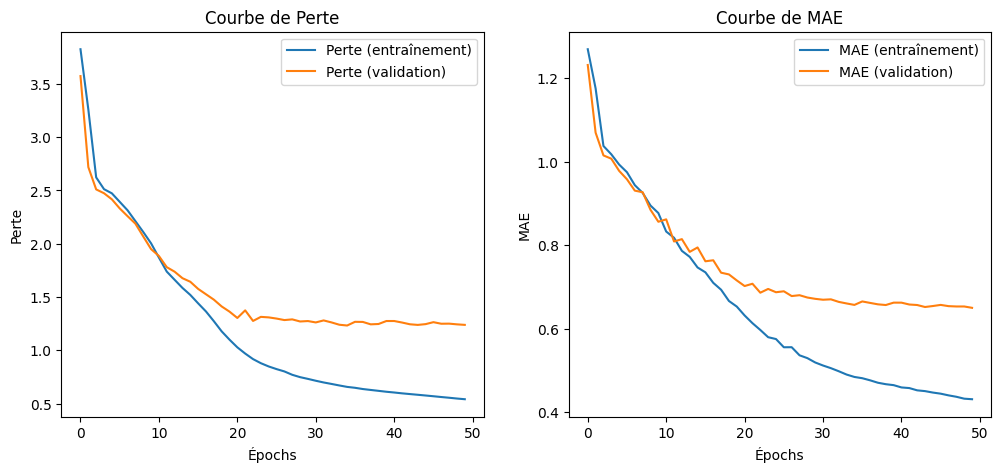

In [ ]:
# Évaluer le modèle sur l'ensemble de test
test_loss, test_mae = model.evaluate(X_test, y_test)

print("Loss sur l'ensemble de test:", test_loss)
print("MAE sur l'ensemble de test:", test_mae)

# Affichage des courbes de performance
plt.figure(figsize=(12, 5))

# Courbe de la perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte (entraînement)')
plt.plot(history.history['val_loss'], label='Perte (validation)')
plt.title('Courbe de Perte')
plt.xlabel('Épochs')
plt.ylabel('Perte')
plt.legend()

# Courbe de la MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE (entraînement)')
plt.plot(history.history['val_mae'], label='MAE (validation)')
plt.title('Courbe de MAE')
plt.xlabel('Épochs')
plt.ylabel('MAE')
plt.legend()

plt.show()


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - loss: 1.2740 - mae: 1.2740 - val_loss: 1.2963 - val_mae: 1.2963
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 1.2844 - mae: 1.2844 - val_loss: 1.2963 - val_mae: 1.2963
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - loss: 1.2692 - mae: 1.2692 - val_loss: 1.2963 - val_mae: 1.2963
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 1.2723 - mae: 1.2723 - val_loss: 1.2963 - val_mae: 1.2963
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - loss: 1.2698 - mae: 1.2698 - val_loss: 1.2962 - val_mae: 1.2962
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 1.2749 - mae: 1.2749 - val_loss: 1.2962 - val_mae: 1.2962
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - loss: 1.2742 - mae: 1.2742 - val_loss: 1.2962 - val_mae: 1.2962
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - loss: 1.2800 - mae: 1.2800 - val_loss: 1.2962 - val_mae: 1.2962
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 1.2716 - mae: 1.2716 - val_loss: 1.2962

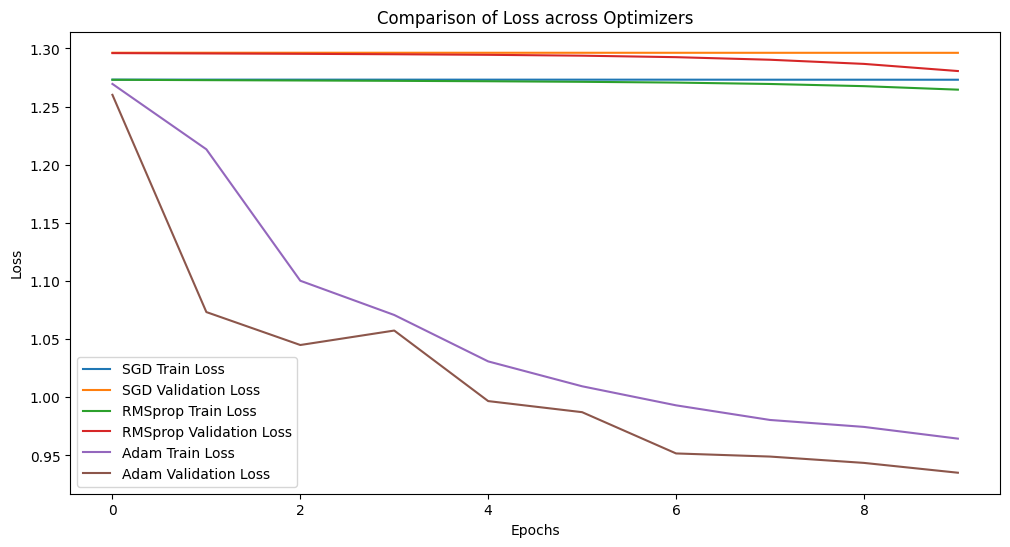

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Supposons que vous avez déjà défini et normalisé vos données ici
# X_train, X_val, X_test, y_train, y_val, y_test

# Définir les optimiseurs
optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.001),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001)
}

histories = {}

for name, optimizer in optimizers.items():
    # Redéfinir le modèle
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(30000, activation='linear'))  # 10000 points, chaque point a 3 coordonnées

    # Compiler le modèle avec l'optimiseur choisi
    model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])

    # Entraîner le modèle
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

    # Stocker l'historique
    histories[name] = history

# Tracer les courbes de perte pour chaque optimiseur
plt.figure(figsize=(12, 6))

for name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{name} Train Loss')
    plt.plot(history.history['val_loss'], label=f'{name} Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Comparison of Loss across Optimizers')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


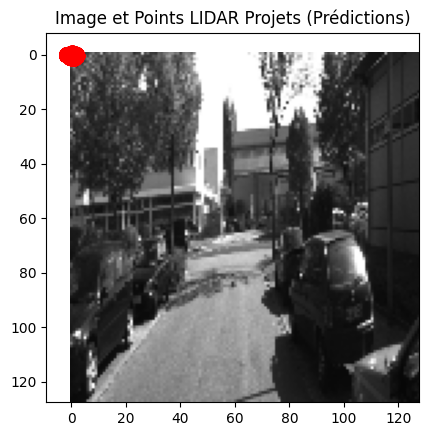

In [ ]:
import matplotlib.pyplot as plt

# Faire une prédiction sur les données de test
y_pred = model.predict(X_test)

# Visualiser une image avec ses points LIDAR projetés
index = 0  # Index de l'image à visualiser
image = X_test[index]
lidar_pred = y_pred[index].reshape(fixed_length, 3)  # Reshaper les prédictions

# Afficher l'image
plt.imshow(image)
plt.scatter(lidar_pred[:, 0], lidar_pred[:, 1], c='r', marker='o')  # Projeter les points LIDAR prédits
plt.title("Image et Points LIDAR Projets (Prédictions)")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

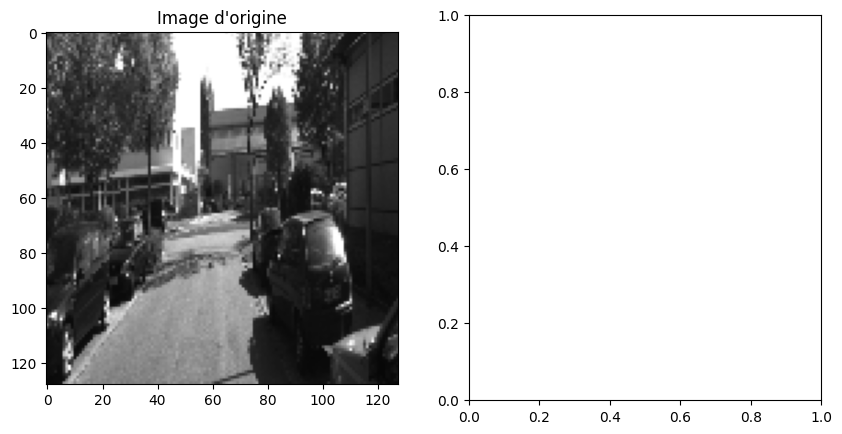

In [ ]:
# Faire des prédictions sur l'ensemble de test
predictions = model.predict(X_test)

# Visualiser quelques prédictions et les comparer avec les labels réels
for i in range(5):  # Par exemple, visualiser 5 prédictions
    plt.figure(figsize=(10, 5))

    # Image d'origine
    plt.subplot(1, 2, 1)
    plt.imshow(X_test[i])
    plt.title('Image d\'origine')

    # Prédictions du modèle
    plt.subplot(1, 2, 2)
    plt.scatter(predictions[i][:, 0], predictions[i][:, 1], s=1, c='r', label='Prédictions')
    plt.scatter(y_test[i][:, 0], y_test[i][:, 1], s=1, c='g', label='Réel')
    plt.legend()
    plt.title('Projection LIDAR')

    plt.show()


In [ ]:
# Définition des labels (par exemple, coordonnées LIDAR)
labels = np.array(lidar_data_np, dtype=np.float32)

# Entraînement du modèle          #A verifier!!!!!!!!!!!!!!!!!!!!
model.fit(image_data_np, labels, epochs=10, batch_size=32, validation_split=0.2)


NameError: name 'image_data_np' is not defined

In [ ]:
input_shape = (img_train.shape[1], img_train.shape[2], img_train.shape[3])
lidar_input_shape = (lidar_train.shape[1],)

img_input = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu')(img_input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)

In [ ]:
lidar_input = Input(shape=lidar_input_shape)
y = Dense(64, activation='relu')(lidar_input)
y = Dense(128, activation='relu')(y)

In [ ]:
combined = tf.keras.layers.concatenate([x, y])
z = Dense(128, activation='relu')(combined)
z = Dense(64, activation='relu')(z)
output = Dense(1)(z)

model = Model(inputs=[img_input, lidar_input], outputs=output)

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entraînement du modèle
history = model.fit(
    [img_train, lidar_train],
    dist_train,
    validation_data=([img_val, lidar_val], dist_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
25/25 [==============================] - 9s 282ms/step - loss: 0.1350 - mae: 0.2982 - val_loss: 0.0943 - val_mae: 0.2694
Epoch 2/20
25/25 [==============================] - 6s 249ms/step - loss: 0.0866 - mae: 0.2558 - val_loss: 0.0986 - val_mae: 0.2706
Epoch 3/20
25/25 [==============================] - 5s 209ms/step - loss: 0.0824 - mae: 0.2479 - val_loss: 0.1073 - val_mae: 0.2762
Epoch 4/20
25/25 [==============================] - 11s 444ms/step - loss: 0.0831 - mae: 0.2495 - val_loss: 0.0969 - val_mae: 0.2731
Epoch 5/20
25/25 [==============================] - 6s 229ms/step - loss: 0.0794 - mae: 0.2441 - val_loss: 0.0955 - val_mae: 0.2705
Epoch 6/20
25/25 [==============================] - 8s 327ms/step - loss: 0.0740 - mae: 0.2364 - val_loss: 0.0988 - val_mae: 0.2702
Epoch 7/20
25/25 [==============================] - 6s 224ms/step - loss: 0.0721 - mae: 0.2310 - val_loss: 0.0999 - val_mae: 0.2726
Epoch 8/20
25/25 [==============================] - 6s 260ms/step - loss: 0

In [ ]:
loss, mae = model.evaluate([img_val, lidar_val], dist_val)
print(f"Loss: {loss}, MAE: {mae}")

7/7 [==============================] - 0s 51ms/step - loss: 0.1322 - mae: 0.3040
Loss: 0.13219496607780457, MAE: 0.30402982234954834


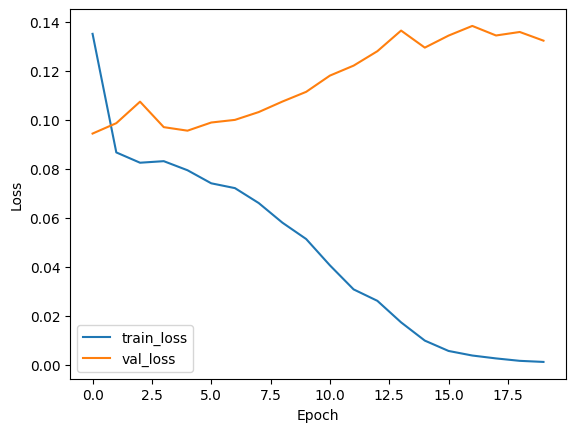

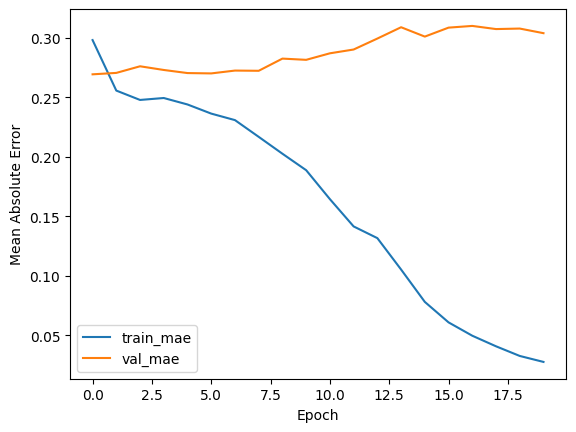

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()